In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
data.sample(6)

,age,sex,bmi,children,smoker,region,expenses
298,31,male,34.4,3,yes,northwest,38746.36
152,32,female,37.1,3,no,northeast,6334.34
281,54,male,40.6,3,yes,northeast,48549.18
187,30,female,30.9,3,no,southwest,5325.65
478,21,male,36.9,0,no,southeast,1534.30
1301,62,male,30.9,3,yes,northwest,46718.16


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Numerical Variables**

1. Age  
2. BMI  
3. Expenses

**Categorical Variables**

1. sex
2. children
3. smoker
4. region










In [13]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


**Exploratory Data Analysis**

---


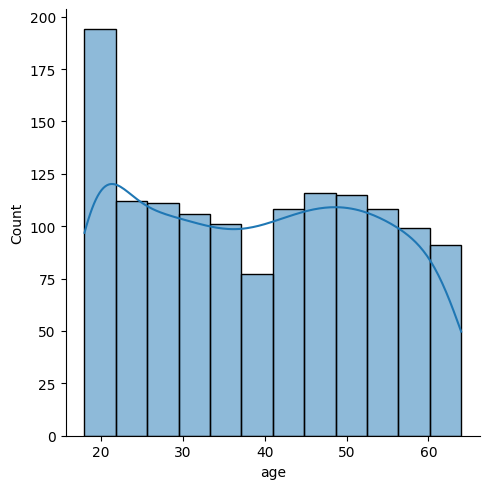

In [15]:
sns.displot(data,x='age',kde=True)

We must look to tranform this column so as to give a better linear model.

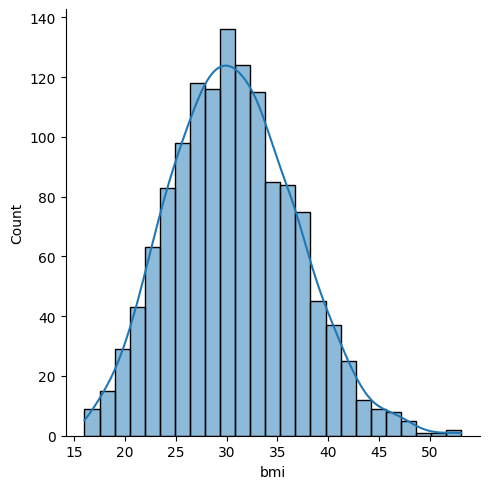

In [16]:
sns.displot(data,x='bmi',kde=True)

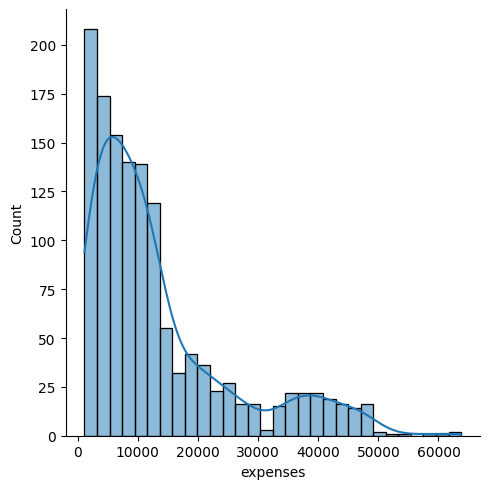

In [17]:
sns.displot(data,x="expenses",kde=True)

In [18]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<Axes: xlabel='smoker', ylabel='count'>

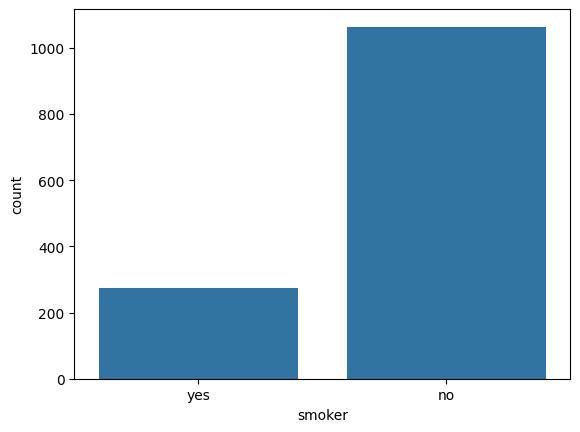

In [19]:
sns.countplot(data,x='smoker')

We need to transform this expenses to make it more linear

# New Section

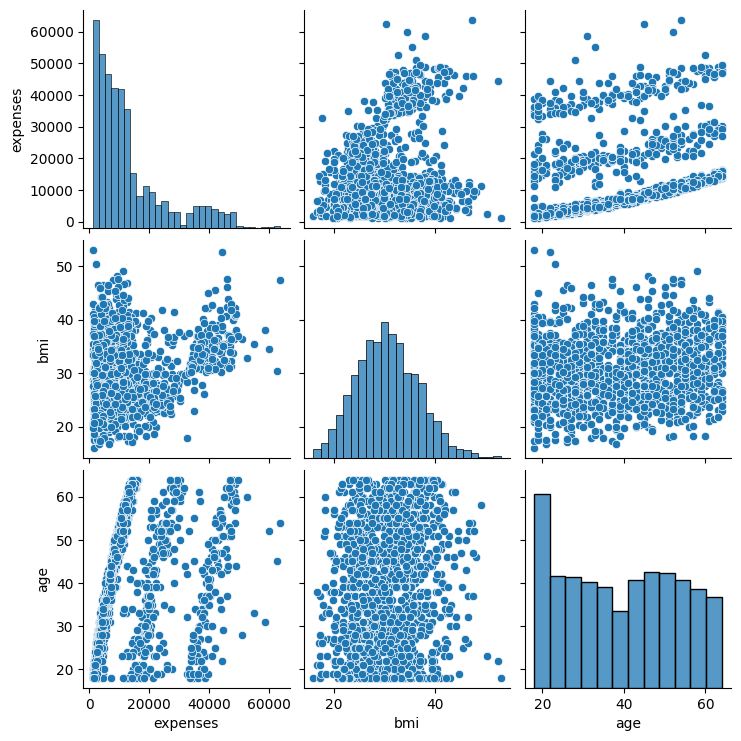

In [20]:
sns.pairplot(data,vars=['expenses','bmi','age'])

<Axes: >

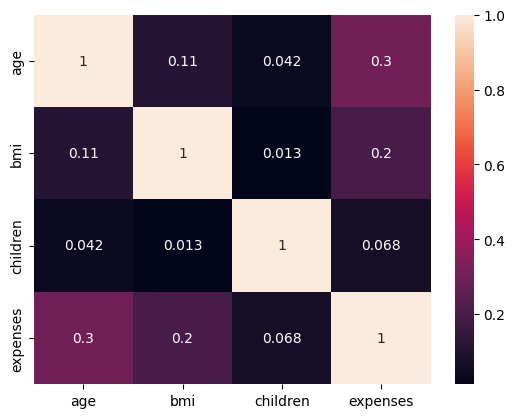

In [21]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

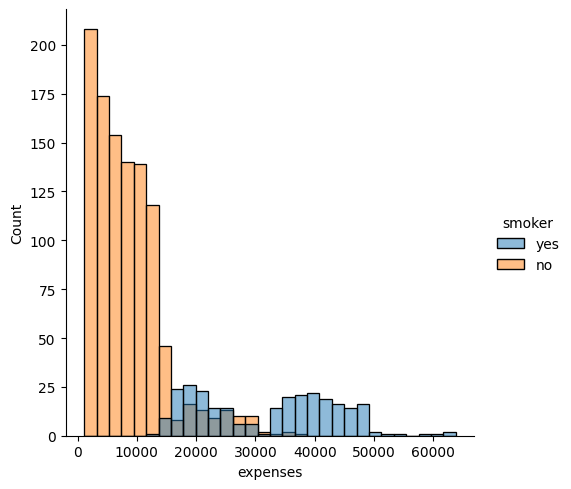

In [ ]:
sns.displot(data,x='expenses',hue='smoker')

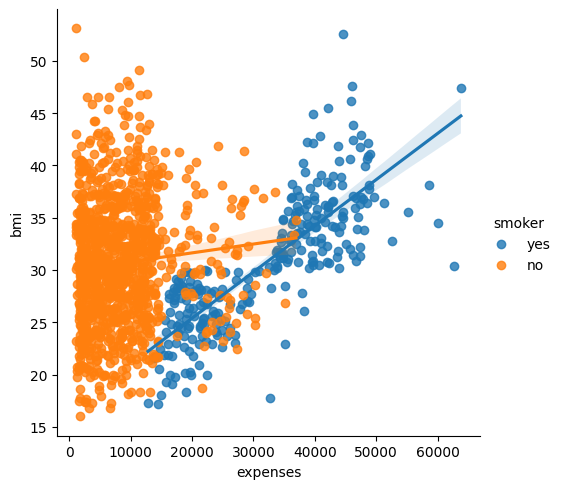

In [22]:
sns.lmplot(data,x='expenses',y='bmi',hue='smoker')

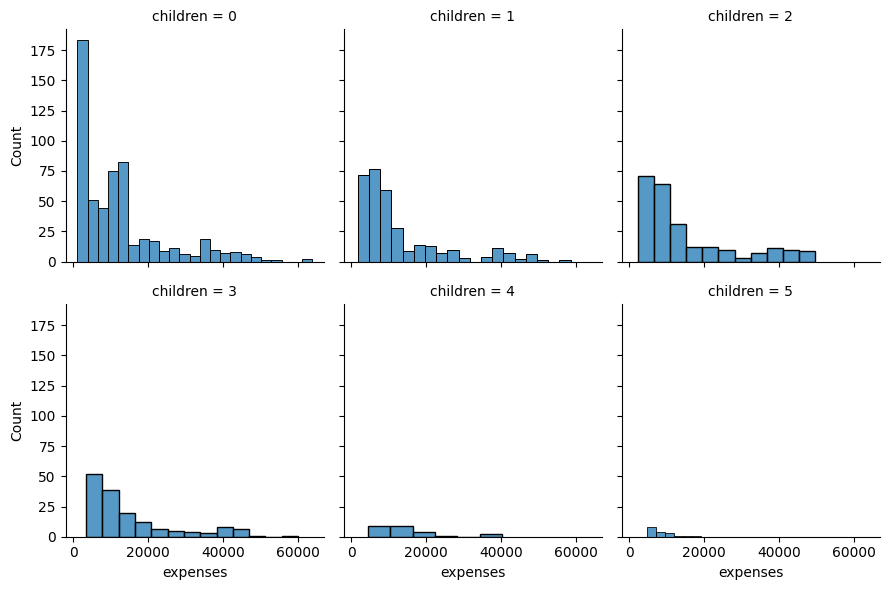

In [23]:
f = sns.FacetGrid(data,col='children',col_wrap=3)
f.map_dataframe(sns.histplot, x="expenses")

In [24]:
data = data.join(pd.get_dummies(data[['sex','region','smoker']],drop_first=True))
data.drop(['sex','region','smoker'],axis=1,inplace=True)

In [25]:
data.sample(6)

,age,bmi,children,expenses,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
288,59,36.8,1,47896.79,False,False,False,False,True
902,26,27.3,3,4661.29,True,False,False,False,False
1216,40,25.1,0,5415.66,True,False,True,False,False
184,44,30.7,2,7731.43,True,False,True,False,False
142,34,25.3,2,18972.50,True,False,True,False,True
834,36,33.8,1,5377.46,True,True,False,False,False


<Axes: >

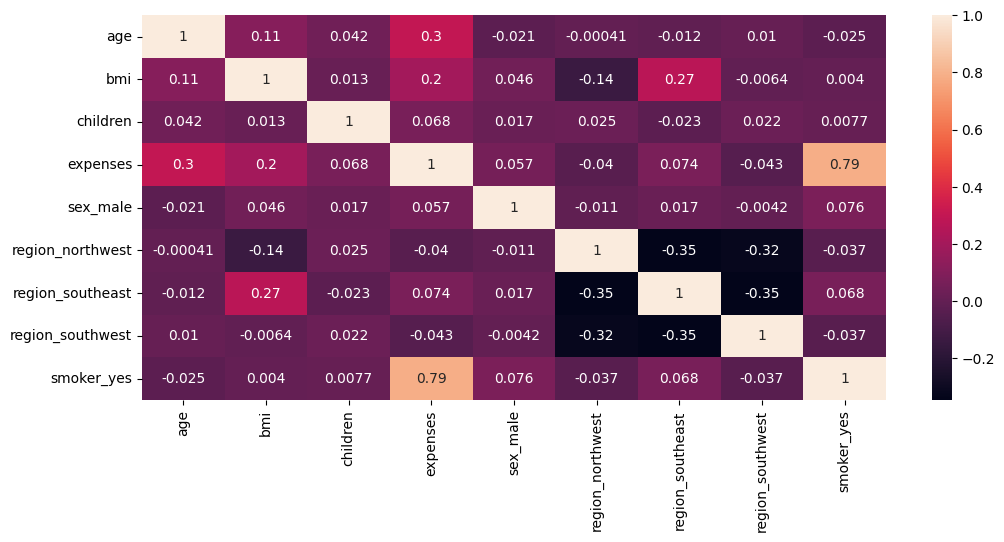

In [26]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

In [27]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    [('transfrom',PowerTransformer(method='box-cox'),[0,3])]  ,
    remainder='passthrough'
)

data_t = ct.fit_transform(data)

In [28]:
from random import sample
import math

def transform_age(x):
    x = list(x)
    for i in range(len(x)):
        u = sample(x, 1)
        v = x[i]
        result = math.sqrt(2)

In [29]:
pi = 3.145

<Axes: xlabel='age', ylabel='Count'>

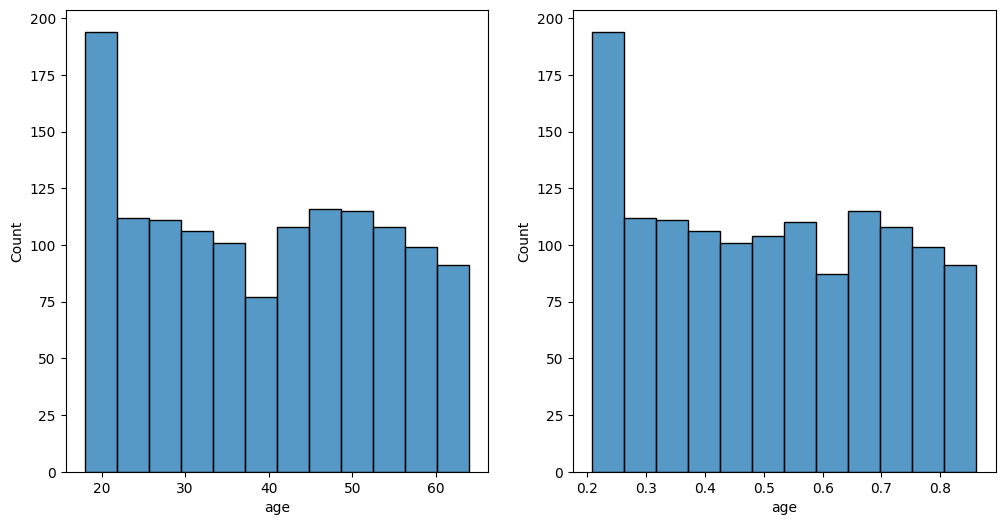

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data['age'],ax=axes[0])
sns.histplot(np.sqrt(np.log(data['age']))*np.sin(2*pi*data['age']),ax=axes[1])

In [31]:
data_n = pd.DataFrame(data_t,columns=(list(data.columns[[0,3]]) + [col for col in data.columns if col not in data.columns[[0,3]]]))

<Axes: xlabel='age', ylabel='Density'>

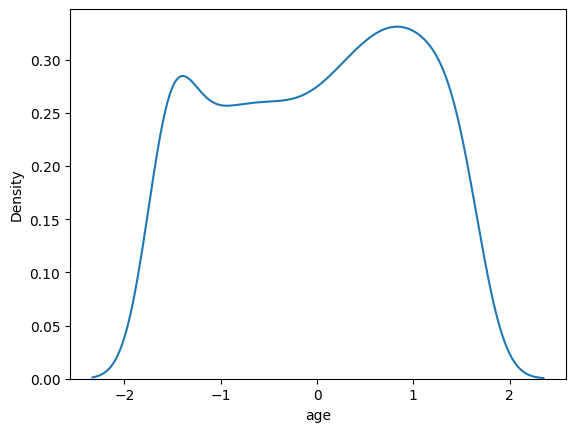

In [32]:
sns.kdeplot(data_n,x='age')

<Axes: xlabel='expenses', ylabel='Density'>

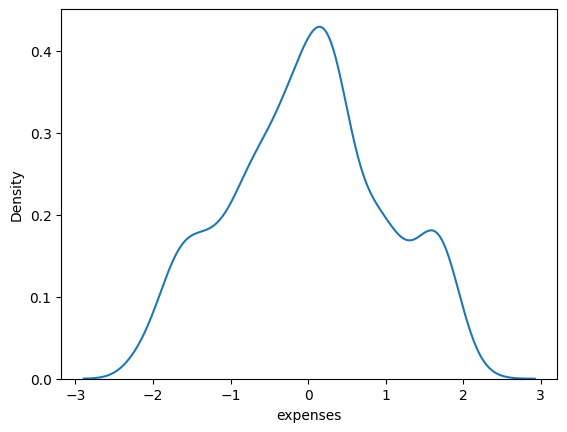

In [33]:
sns.kdeplot(data_n,x='expenses')

In [34]:
ct = ColumnTransformer(
    [('scale',StandardScaler(copy=False),[2])],
    remainder = 'passthrough'
)

d = ct.fit_transform(data_n)

In [35]:
df = pd.DataFrame(d,columns = [data_n.columns[2]] + [col for col in data_n.columns if col not in data_n.columns[2]])

In [36]:
df['Age*sm'] = df['age'] * df['smoker_yes']
df['bmi*sm'] = df['bmi'] * df['smoker_yes']

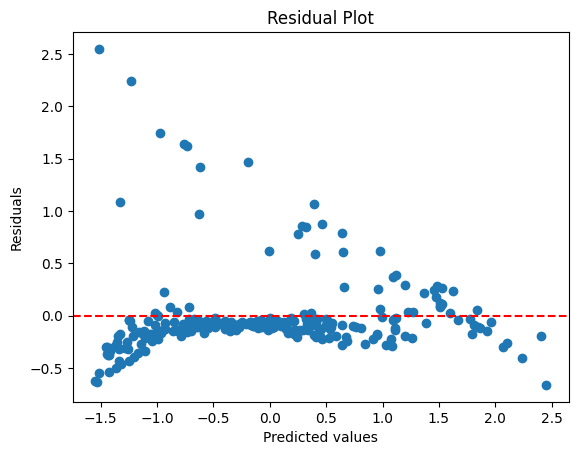

R²: 0.8559
Adjusted R²: 0.8503


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[[col for col in df.columns if col not in df.columns[2]]]
y = df['expenses']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Print adjusted R²
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

In [52]:
print(pd.DataFrame({
    'Variables' : model.feature_names_in_,
    'Coefficients' : model.coef_
}))

          Variables  Coefficients
0               bmi      0.009796
1               age      0.621588
2          children      0.098445
3          sex_male     -0.088538
4  region_northwest     -0.071718
5  region_southeast     -0.135924
6  region_southwest     -0.165291
7        smoker_yes      1.686371
8            Age*sm     -0.496533
9            bmi*sm      0.369136


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score




X = df[[col for col in df.columns if col not in df.columns[[2,10]]]]
y = df['expenses']

model = LinearRegression()


kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_results = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(r2_score))

# Display the R² score for each fold and the mean R² score
print("R² scores for each fold:", cv_results)
print("Mean R² score:", cv_results.mean())

R² scores for each fold: [0.84048263 0.77194534 0.83708762 0.75707987 0.80804794]
Mean R² score: 0.802928679538466


In [51]:
model.feature_names_in_

array(['bmi', 'age', 'children', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest', 'smoker_yes', 'Age*sm',
       'bmi*sm'], dtype=object)

In [44]:
df

,bmi,age,expenses,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,Age*sm,bmi*sm
0,-0.453646,-1.526649,0.681644,0,False,False,False,True,True,-1.526649,-0.453646
1,0.514186,-1.619368,-1.748874,1,True,False,True,False,False,-0.0,0.0
2,0.382954,-0.761699,-0.768782,3,True,False,True,False,False,-0.0,0.0
3,-1.30665,-0.377504,0.978814,0,True,True,False,False,False,-0.0,-0.0
4,-0.289606,-0.452483,-0.916559,0,True,True,False,False,False,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.054876,0.789252,0.165744,3,True,True,False,False,False,0.0,0.0
1334,0.202511,-1.619368,-1.498607,0,False,False,False,False,False,-0.0,0.0
1335,1.022707,-1.619368,-1.80664,0,False,False,True,False,False,-0.0,0.0
1336,-0.798128,-1.34655,-1.594759,0,False,False,False,True,False,-0.0,-0.0


In [53]:
df['age*bmi'] = df['age'] * df['bmi']

In [54]:
df

,bmi,age,expenses,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,Age*sm,bmi*sm,age*bmi
0,-0.453646,-1.526649,0.681644,0,False,False,False,True,True,-1.526649,-0.453646,0.692558
1,0.514186,-1.619368,-1.748874,1,True,False,True,False,False,-0.0,0.0,-0.832656
2,0.382954,-0.761699,-0.768782,3,True,False,True,False,False,-0.0,0.0,-0.291696
3,-1.30665,-0.377504,0.978814,0,True,True,False,False,False,-0.0,-0.0,0.493265
4,-0.289606,-0.452483,-0.916559,0,True,True,False,False,False,-0.0,-0.0,0.131042
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.054876,0.789252,0.165744,3,True,True,False,False,False,0.0,0.0,0.043311
1334,0.202511,-1.619368,-1.498607,0,False,False,False,False,False,-0.0,0.0,-0.32794
1335,1.022707,-1.619368,-1.80664,0,False,False,True,False,False,-0.0,0.0,-1.65614
1336,-0.798128,-1.34655,-1.594759,0,False,False,False,True,False,-0.0,-0.0,1.07472


In [55]:
import statsmodels.api as sm

X = df[[col for col in df.columns if col not in df.columns[[2,10]]]]
y = df['expenses']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_t2 = sm.add_constant(X_train)

In [56]:
model = sm.OLS(y_train.astype(float), X_t2.astype(float)).fit()

In [57]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     418.1
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:43:08   Log-Likelihood:                -653.42
No. Observations:                1070   AIC:                             1329.
Df Residuals:                    1059   BIC:                             1384.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3294      0.034  

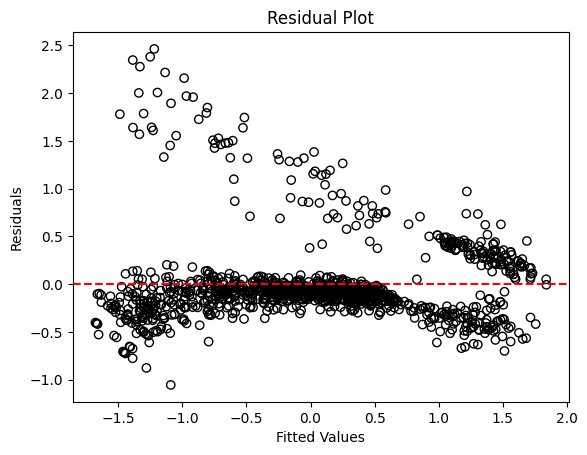

In [61]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_values, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [62]:
X_train

,bmi,age,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,Age*sm,age*bmi
560,-1.749556,0.530285,2,False,True,False,False,False,0.0,-0.927763
1285,-1.044187,0.595797,0,False,False,False,False,False,0.0,-0.622123
1142,-0.945763,0.915797,0,False,False,True,False,False,0.0,-0.866127
969,0.596205,0.055618,5,False,False,True,False,False,0.0,0.03316
486,-1.503497,1.04052,3,False,True,False,False,False,0.0,-1.564418
...,...,...,...,...,...,...,...,...,...,...
1095,0.120492,-1.619368,4,False,False,False,False,False,-0.0,-0.19512
1130,-1.109803,0.055618,5,False,False,True,False,False,0.0,-0.061726
1294,-0.896552,1.284864,0,True,False,False,False,False,0.0,-1.151947
860,2.777927,-0.085767,2,False,False,False,True,True,-0.085767,-0.238255


Interpretation:
1. **Model Fit**
 * R-squared (0.820): The model explains 82% of the variance in the dependent variable (charges). This suggests a strong model fit.
 * Adjusted R-squared (0.819): After adjusting for the number of predictors, the model still explains 81.9% of the variance, indicating that the added predictors and interaction terms are valuable without overfitting.
 * F-statistic (484.0) and Prob (F-statistic: 0.00): The overall model is statistically significant (p-value < 0.05), meaning at least one predictor has a significant relationship with the target (charges).
2. **Coefficients:**
Each coefficient represents the expected change in the charges variable for a one-unit increase in the corresponding predictor, holding all other variables constant.
 * Intercept (const: -0.3146): When all predictors are zero, the model predicts that charges would be -0.31, but this value is not very interpretable on its own.
 * BMI (bmi: 0.0099, p = 0.517): BMI has a small positive relationship with charges, but the coefficient is not statistically significant (p-value > 0.05). This means BMI alone is not a significant predictor of medical charges in this model.
 * Age (age: 0.6216, p = 0.000): For every one-year increase in age, charges increase by 0.6216 units, and this effect is highly significant.
 * Children (children: 0.0984, p = 0.000): Each additional child increases the expected charges by 0.0984 units, and this is statistically significant.
 * Sex (sex_male: -0.0886, p = 0.001): Being male reduces expected charges by 0.0886 units compared to females, and this is statistically significant.
 *Smoker (smoker_yes: 1.6865, p = 0.000): Being a smoker drastically increases charges by 1.6865 units, which is highly significant. Smoking seems to be one of the largest determinants of medical charges.  
 * Regions:
    * Region_northwest (-0.0718, p = 0.052): Living in the northwest has a small negative effect on charges, but it is marginally significant.
    * Region_southeast (-0.1360, p = 0.000): Living in the southeast significantly reduces charges.
    * Region_southwest (-0.1654, p = 0.000): Similarly, living in the southwest also significantly reduces charges.

3. **Interaction Terms:**
 * Age * Smoker (Age*sm: -0.4964, p = 0.000): This interaction suggests that the effect of age on charges is reduced for smokers. While age normally increases charges, for smokers, the charges increase at a slower rate with age.
 * BMI * Smoker (bmi*sm: 0.3691, p = 0.000): This interaction indicates that higher BMI has a more positive effect on charges for smokers than for non-smokers. The combination of smoking and a higher BMI leads to even higher medical charges.
4. **Model Diagnostics:**
 * Omnibus and Jarque-Bera tests: Both tests for normality of residuals have p-values of 0.000, indicating that the residuals are not normally distributed. This could suggest potential model issues or that certain assumptions of linear regression (like normality of residuals) are violated.
 * Skewness (3.040) and Kurtosis (13.362): The high skew and kurtosis values suggest that the distribution of residuals is far from normal, with long tails and possible outliers.
 * Durbin-Watson (2.108): This value close to 2 indicates that there is no strong autocorrelation in the residuals, meaning the errors are independent.
5. **Conclusion:**
 * The model seems to fit the data well with an R-squared of 0.820 and adjusted R-squared of 0.819.
 * Age, number of children, sex, smoking status, and regions (southeast and southwest) are significant predictors of medical charges.
 * The interaction between age and smoking status indicates that the effect of age on charges is moderated by whether a person smokes, while higher BMI amplifies the impact of smoking on charges.
 * However, some diagnostic statistics suggest potential non-normality in the residuals, which might require further investigation or a more complex model to address these issues.






